## 1. Task Introduction & Dataset

This project aims to leverage transaction-level data to perform **customer segmentation** on an e-commerce platform, identifying user groups with similar purchasing behaviors. This enables businesses to develop more precise marketing strategies, deliver personalized recommendations, and optimize customer relationship management.

We employ a synthetic sales dataset modeled after Amazon, comprising 100,000 transaction records, with each row representing a customer's purchasing behavior. The variables include:

1. Order Details
   - OrderID
   - OrderDate
   - OrderStatus
   - SellerID

2. Customer Information
   - CustomerID
   - CustomerName
   - City
   - State
   - Country

3. Product Information
   - ProductID
   - ProductName
   - Category
   - Brand
   - Quantity

4. Pricing & Revenue Metrics
   - UnitPrice
   - Discount
   - Tax
   - ShippingCost
   - TotalAmount



## 2. Data Loading & Overview

In this section, we load the raw dataset and perform an overview of its structure.

**Step 1 – Import libraries**  
Some main Python packages used throughout the analysis, including:
- `pandas` for data manipulation  
- `numpy` for numerical operations  
- `matplotlib` for visualization  

**Step 2 – Read the dataset**  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATA_PATH = "Amazon.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [5]:
print(df.columns.tolist())  # print the column names

['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID', 'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus', 'City', 'State', 'Country', 'SellerID']


In [7]:
df.info()  # print detail info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [10]:
df.describe(include="all").T  # descriptive statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderID,100000,100000,ORD0000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrderDate,100000,1825,2022-04-28,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerID,100000,43233,CUST023748,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerName,100000,200,Karan Joshi,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductID,100000,50,P00019,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductName,100000,50,LED Desk Lamp,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,100000,6,Electronics,16853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,100000,10,ReadMore,10204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,100000.0,NaN,NaN,NaN,3.0014,1.413548,1.0,2.0,3.0,4.0,5.0
UnitPrice,100000.0,NaN,NaN,NaN,302.905748,171.840797,5.0,154.19,303.07,451.5,599.99


## 2. Exploratory Data Analysis

### 2.1 Order date distribution

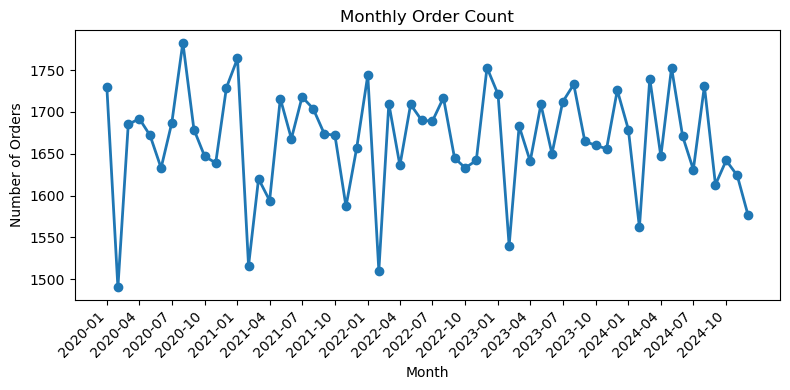

In [170]:
# Order date distribution
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")
df_clean = df.dropna(subset=["OrderDate"]).copy()

month_counts = (
    df_clean["OrderDate"]
    .dt.to_period("M")
    .value_counts()
    .sort_index()
)

months = month_counts.index.to_timestamp()
counts = month_counts.values

plt.figure(figsize=(8,4))
plt.plot(months, counts, marker="o", linewidth=2)

plt.title("Monthly Order Count")
plt.xlabel("Month")
plt.ylabel("Number of Orders")

step = 3
plt.xticks(months[::step], [m.strftime("%Y-%m") for m in months[::step]], rotation=45, ha="right")
plt.tight_layout()
plt.savefig("figures/order_monthly_distribution.png", dpi=300)
plt.show()

- The volume of transactions generally fluctuating between 1,550 and 1,750 orders per month. 
- A few sharper drops appear intermittently (e.g., early 2020, mid-2021, and mid-2023), which may reflect random variation or simulated seasonality in the dataset. 
- The order volume exhibits moderate short-term fluctuations but high long-term stability, suggesting that customer demand in this dataset remains consistent across time.

### 2.2 Payment method

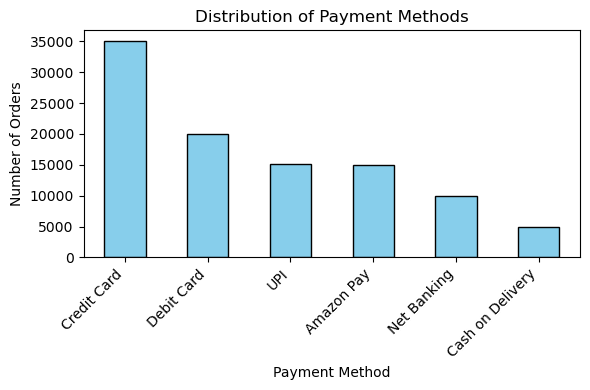

In [169]:
# Payment method
plt.figure(figsize=(6,4))

df["PaymentMethod"].value_counts().plot(
    kind="bar",
    color="skyblue",
    edgecolor="black"
)

plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.savefig("figures/payment_method_distribution.png", dpi=300)
plt.show()

- Credit Card is the most used payment method, showing that customers strongly prefer fast and convenient digital payments.
- Debit Card, UPI, and Amazon Pay also have notable usage, indicating a balanced adoption of multiple online payment options.
- Net Banking is less popular, possibly due to slower processing or lower convenience compared to other digital methods.
- Cash on Delivery is the least used option, suggesting that most customers trust digital payment systems.
- Overall, the payment method distribution indicates a digitally mature customer base with a clear preference for online transactions.

### 2.3 Correlation Analysis - Order-Level

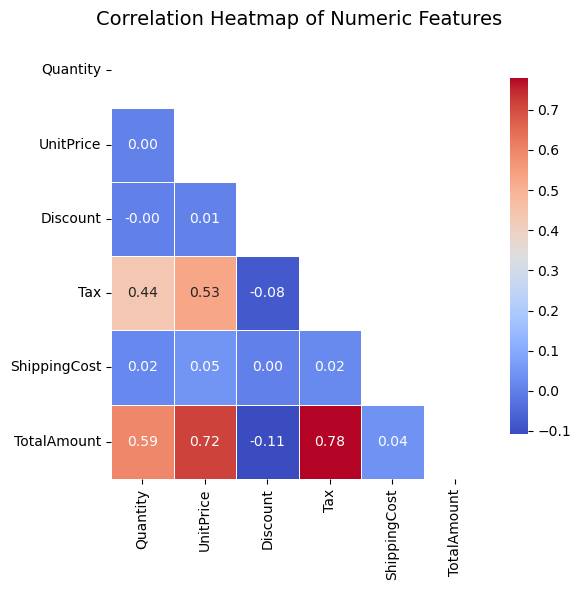

In [172]:
import seaborn as sns
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.savefig("figures/correlation_heatmap.png", dpi=300)
plt.show()

**TotalAmount shows strong positive correlations with several variables:**
- UnitPrice (0.72) — Higher-priced items directly lead to higher total spending.
- Tax (0.78) — Tax is proportional to transaction value, explaining the strong relationship.
- Quantity (0.59) — Buying more items naturally increases the total amount.

**Tax also shows moderate correlations with:**
- UnitPrice (0.53) — Higher-priced items incur higher tax.
- Quantity (0.44) — Larger purchases lead to higher tax.

**ShippingCost has almost no correlation with other variables, suggesting it is relatively stable and not influenced by product price or quantity.**

**Discount shows weak or negative correlations, meaning discounts are not strongly tied to purchase size or product value.**

Overall, the heatmap indicates that transaction value–related variables (UnitPrice, Quantity, Tax) play the most important role in determining TotalAmount, while discounting and shipping costs have limited influence.


## 3. Customer-Level Feature Engineering

### 3.1 Create customer-level features

In [184]:
df_customer = df.copy()

# Ensure numeric fields are numeric
numeric_cols = ["Quantity", "UnitPrice", "Discount", "Tax", "ShippingCost", "TotalAmount"]
df_customer[numeric_cols] = df_customer[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Group by CustomerID to create customer-level dataset
customer_features = df_customer.groupby("CustomerID").agg(
    total_spending=("TotalAmount", "sum"),
    total_orders=("OrderID", "count"),
    avg_order_value=("TotalAmount", "mean"),
    avg_quantity=("Quantity", "mean"),
    avg_unit_price=("UnitPrice", "mean"),
    avg_discount_used=("Discount", "mean"),
    avg_shipping_cost=("ShippingCost", "mean"),
    tax_paid_total=("Tax", "sum"),

    # preference features
    category_diversity=("Category", lambda x: x.nunique()),
    brand_diversity=("Brand", lambda x: x.nunique()),
    most_frequent_category=("Category", lambda x: x.value_counts().idxmax())
).reset_index()

customer_features.head()

,CustomerID,total_spending,total_orders,avg_order_value,avg_quantity,avg_unit_price,avg_discount_used,avg_shipping_cost,tax_paid_total,category_diversity,brand_diversity,most_frequent_category
0,CUST000001,446.48,1,446.480000,1.000000,453.36,0.100000,5.820000,32.64,1,1,Home & Kitchen
1,CUST000002,1389.93,3,463.310000,3.000000,219.01,0.083333,6.580000,101.50,2,2,Toys & Games
2,CUST000003,1116.91,1,1116.910000,5.000000,241.37,0.150000,9.020000,82.07,1,1,Electronics
3,CUST000004,2660.06,3,886.686667,2.333333,415.93,0.183333,6.016667,237.27,2,3,Electronics
4,CUST000005,1089.56,1,1089.560000,4.000000,303.75,0.200000,0.920000,116.64,1,1,Books



### 3.2 Filter out redundant features

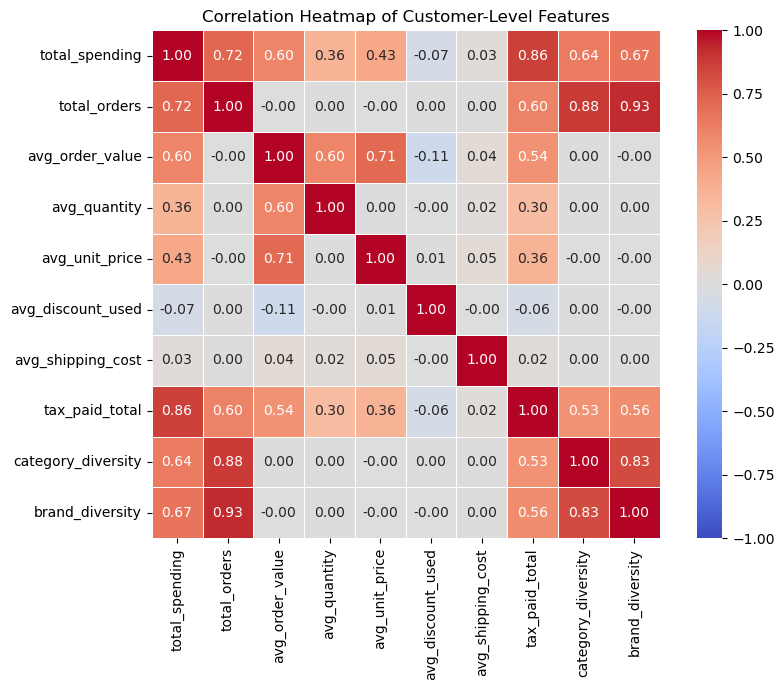

In [188]:
numeric_cols = customer_features.select_dtypes(include=[np.number]).columns
corr_matrix = customer_features[numeric_cols].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,     
    fmt=".2f",          
    cmap="coolwarm",    
    vmin=-1, vmax=1,     
    square=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Customer-Level Features")
plt.tight_layout()
plt.savefig("figures/customer_feature_correlation.png", dpi=300)
plt.show()

We could filter out highly correlated features, for example:

- total_spending ↔ tax_paid_total (0.86)
- total_orders ↔ brand_diversity (0.93)
- total_orders ↔ category_diversity (0.88)
- avg_order_value ↔ avg_unit_price (0.71)

Then, we select features with high interpretability:

We prioritize features that:
- Are easy to interpret by business teams
- Capture distinct dimensions of customer behavior
- Provide useful variance for clustering

Based on these principles, four features are most meaningful:

- avg_order_value — spending level
- avg_quantity — purchase volume
- avg_discount_used — price sensitivity
- brand_diversity — preference breadth

## 4.  Principal Component Analysis - PCA

We used PCA to reduce dimensionality and improve clustering performance.

### 4.1 Standardization
Before performing PCA, some preprocessing work was done: **feature selection and standardization.**

In [189]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Select columns
cluster_features = [
    "avg_order_value",
    "avg_quantity",
    "avg_discount_used",
    "brand_diversity",
]

X = customer_features[cluster_features].copy()

print("Missing values:\n", X.isna().sum())

X = X.fillna(X.mean())

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]


Missing values:
 avg_order_value      0
avg_quantity         0
avg_discount_used    0
brand_diversity      0
dtype: int64


array([[-8.55679121e-01, -1.86011836e+00,  4.11327553e-01,
        -1.03399316e+00],
       [-8.25167013e-01, -4.50624857e-04,  1.45393764e-01,
        -9.17545517e-02],
       [ 3.59783304e-01,  1.85921711e+00,  1.20912892e+00,
        -1.03399316e+00],
       [-5.76022711e-02, -6.20339870e-01,  1.74099650e+00,
         8.50484055e-01],
       [ 3.10198862e-01,  9.29383243e-01,  2.00693029e+00,
        -1.03399316e+00]])

### 4.2 PCA Explained Variance & Scree Plot Interpretation

In [192]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
explained_var


array([0.401569  , 0.25021732, 0.24935824, 0.09885544])

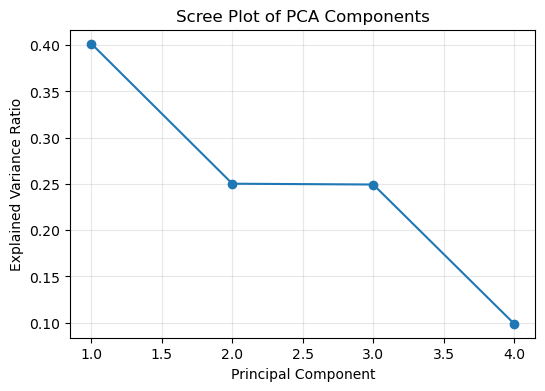

In [193]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA Components")
plt.grid(alpha=0.3)
plt.savefig("figures/pca_scree_plot.png", dpi=300)
plt.show()

## 5. Clustering

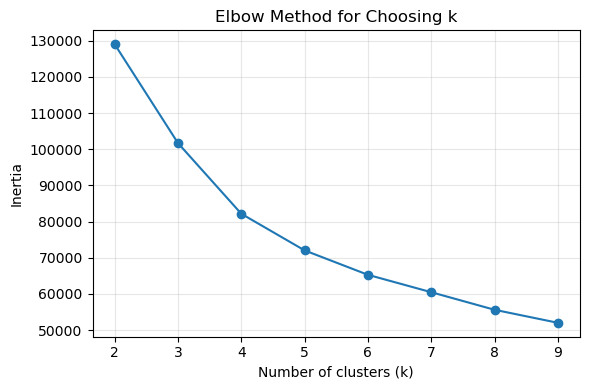

In [198]:
from sklearn.cluster import KMeans

inertias = []
k_values = range(2, 10)  # try 2 to 8 categories

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(list(k_values), inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Choosing k")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figures/kmeans_elbow_plot.png", dpi=300)
plt.show()

In [195]:
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
customer_features["cluster"] = cluster_labels
customer_features[["CustomerID", "cluster"] + cluster_features].head()

,CustomerID,cluster,avg_order_value,avg_quantity,avg_discount_used,brand_diversity
0,CUST000001,2,446.480000,1.000000,0.100000,1
1,CUST000002,2,463.310000,3.000000,0.083333,2
2,CUST000003,0,1116.910000,5.000000,0.150000,1
3,CUST000004,1,886.686667,2.333333,0.183333,3
4,CUST000005,1,1089.560000,4.000000,0.200000,1


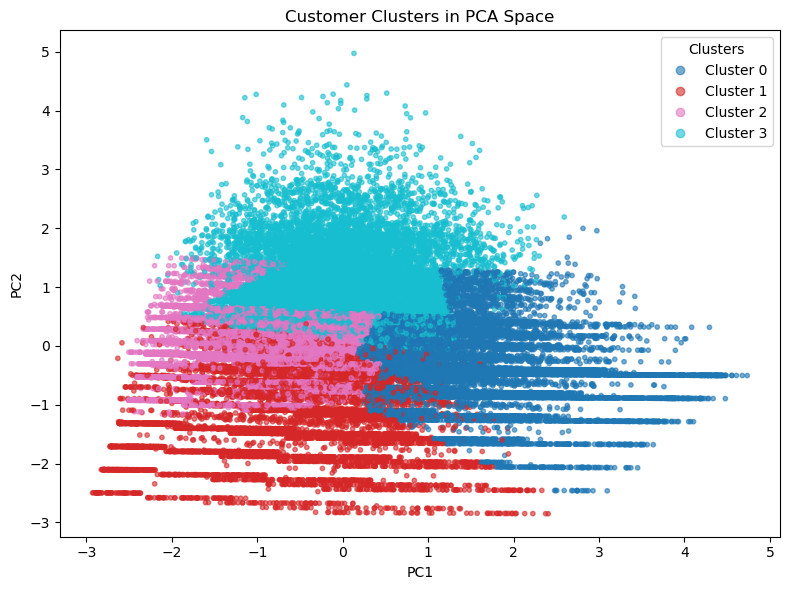

In [196]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=cluster_labels, 
    cmap="tab10", 
    alpha=0.6,
    s=10
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters in PCA Space")

handles, _ = scatter.legend_elements()
plt.legend(handles, [f"Cluster {i}" for i in range(k_opt)], title="Clusters")

plt.tight_layout()
plt.savefig("figures/pca_clusters.png", dpi=300)
plt.show()

In [197]:
cluster_profile = (
    customer_features
    .groupby("cluster")[cluster_features]
    .mean()
    .round(2)
)

cluster_profile

,avg_order_value,avg_quantity,avg_discount_used,brand_diversity
cluster,,,,
0,1528.89,4.07,0.05,1.61
1,683.51,2.87,0.17,1.62
2,547.54,2.14,0.04,1.57
3,899.49,2.99,0.07,3.52


Based on the four customer-level behavioral features, we can conclude each cluster's average characteristics:

**Cluster 0 — High-Value Heavy Buyers**

Key traits:
- Highest order value (1528.89)
- Highest purchase quantity (4.07)
- Low discount usage (0.05)
- Low brand diversity (1.61)

*Interpretation:*
These customers spend significantly more per order and buy in larger quantities. They do not rely heavily on discounts and tend to purchase from a small set of preferred brands.

**Cluster 1 — Price-Sensitive Moderate Buyers**

Key traits:
- Medium order value (683.51)
- Medium quantity (2.87)
- Highest discount usage among all clusters (0.17)
- Average brand diversity (1.62)

Interpretation:
These customers buy moderately but are highly motivated by discounts. They may wait for promotions before placing orders.

**Cluster 2 — Low-Value Low-Engagement Buyers**

Key traits:
- Lowest order value (547.54)
- Lowest quantity (2.14)
- Low discount usage
- Lowest brand diversity

Interpretation:
Customers in this segment buy infrequently, spend the least per order, and stay within very few brands.

**Cluster 3 — Brand Explorers with Medium Spending**

Key traits:
- Medium-high order value (899.49)
- Moderate quantity
- Relatively low discount dependence
- Highest brand diversity (3.52)

Interpretation:
These customers show strong willingness to try different brands. They are less price-sensitive and purchase across multiple categories or styles.